Dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3.

A1: 0,1 CATEGORICAL (formerly: a,b)

A2: continuous.

A3: continuous.

A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)

A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)

A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)

A7: continuous.

A8: 1, 0 CATEGORICAL (formerly: t, f)

A9: 1, 0 CATEGORICAL (formerly: t, f)

A10: continuous.

A11: 1, 0 CATEGORICAL (formerly t, f)

A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)

A13: continuous.

A14: continuous.

A15/class: 1,2 class attribute (formerly: +,-) or (1: Approved or 0: Not Approved)

In [236]:
!pip install MiniSom

Importing MiniSom library

In [237]:
from minisom import MiniSom

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [240]:
X=dataset.iloc[:,0:-1].values
Y=dataset.iloc[:,-1].values

Data Normalization

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

In [242]:
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [243]:
print(X_scaled)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


SOM initializaton and training

In [244]:
n_neuron=10
m_neuron=10
# input_len=number of features or, number of columuns(excluding target)
som=MiniSom(n_neuron, m_neuron, input_len=X_scaled.shape[1], sigma=1, 
            learning_rate=0.5, neighborhood_function='gaussian')
som.random_weights_init(X_scaled)
som.train(X_scaled, 100)

In [245]:
som.distance_map()
#win_map diye kono ekta winning node kon kon sample er jonne hoiche seta bujhaay
mappings=som.win_map(X_scaled,return_indices=True)
#mappings holo ekta dictionary type er container
count=0
for i in mappings:
    print("for coordinate no. ", i)
    print("It is the winning node for sample no. :")
    for j in mappings.get(i):
        print(j)
        count=count+1
print(mappings)
print(count)

for coordinate no.  (6, 3)
It is the winning node for sample no. :
0
111
250
301
351
512
623
652
for coordinate no.  (8, 4)
It is the winning node for sample no. :
1
20
63
82
96
100
122
131
135
141
237
270
289
306
318
394
400
407
411
418
452
477
519
540
552
600
672
for coordinate no.  (5, 8)
It is the winning node for sample no. :
2
176
214
334
548
560
568
for coordinate no.  (6, 1)
It is the winning node for sample no. :
3
9
38
39
45
87
116
124
130
139
171
174
181
220
229
317
342
345
346
361
384
405
466
497
513
522
565
604
646
for coordinate no.  (9, 8)
It is the winning node for sample no. :
4
62
406
459
551
553
615
635
for coordinate no.  (7, 1)
It is the winning node for sample no. :
5
for coordinate no.  (9, 5)
It is the winning node for sample no. :
6
92
107
217
218
244
303
354
377
514
536
592
634
for coordinate no.  (3, 2)
It is the winning node for sample no. :
7
145
149
200
204
215
330
347
430
for coordinate no.  (8, 7)
It is the winning node for sample no. :
8
18
26
51
97
226

Visualization


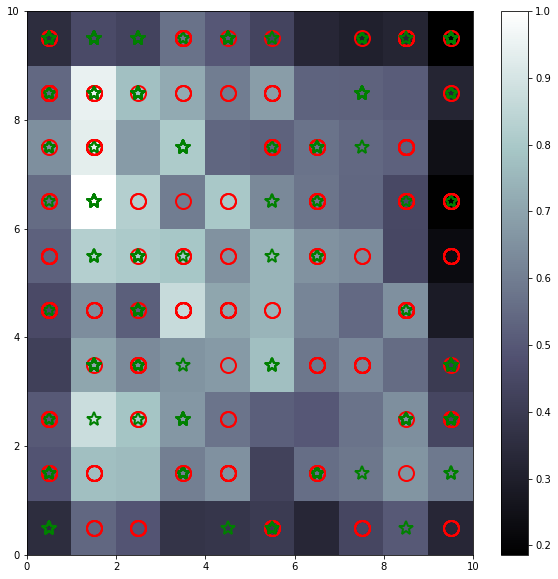

In [246]:
#originally:
#red= 0 means NOT Approved by the bank
#green= 1 means Approved by the bank

#in color graph:
#white=fraud cluster
#black=good cluster
%matplotlib inline
plt.figure(figsize=(10,10))
plt.pcolor(som.distance_map().T, cmap='bone')
plt.colorbar()

markers=['o','*']
colors=['r','g']
for i, xx in enumerate(X_scaled):
    w=som.winner(xx)
    plt.plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],markerfacecolor='None',
             markeredgecolor=colors[Y[i]],markersize=15,markeredgewidth=2)
plt.show()

#decision:
#black+red--> Bank did NOT approve a good people
#black+green-->Bank approved a good people
#white+green--> Bank approved a FRAUD people
#white+red--> Bank did not approve a FRAUD people

Detecting obvious frauds

In [251]:
#at that time coordinates (1,6),(1,7),(1,8) were more white-ish, so they are the obvious frauds
frauds=np.concatenate((mappings.get((1,6)),mappings.get((1,7)),mappings.get((1,8))),axis=0)
for i in frauds:
    print(int(X[i,0]))

15624595
15688264
15795079
15746258
15671987
15773776
15778345
15700511
15791769
15776494
15655658
15681755
15643056
15596165
15690153
15631451
15632503
15711635
15673747
15765487
15754578
15657228
15575430
15569917
15679622
15711977
15808662
15684722
15757188
15776545
15792107
15793896
15650591
15813192
15675450
